## Importando Bibliotecas

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a Base de Dados

In [2]:
database = 'muse_v3.csv'
dados = pd.read_csv(database)

## Entendendo a Base de Dados

In [3]:
dados.shape

(90001, 11)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lastfm_url              90001 non-null  object 
 1   track                   90001 non-null  object 
 2   artist                  90001 non-null  object 
 3   seeds                   90001 non-null  object 
 4   number_of_emotion_tags  90001 non-null  int64  
 5   valence_tags            90001 non-null  float64
 6   arousal_tags            90001 non-null  float64
 7   dominance_tags          90001 non-null  float64
 8   mbid                    61217 non-null  object 
 9   spotify_id              61630 non-null  object 
 10  genre                   83362 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 7.6+ MB


In [5]:
dados.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [6]:
dados.tail()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
89996,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89997,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,progressive rock
89998,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
89999,https://www.last.fm/music/second%2bchyld/_/tra...,Transparent (Full Version),Second Chyld,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,NaN
90000,https://www.last.fm/music/message%2bto%2bbears...,Unfold,Message To Bears,['translucent'],2,3.340000,1.405000,3.500000,247179b0-af1f-4c2b-b4fe-751070d1c0cc,14BYEOeRb3jzglJmKX8eM2,ambient


In [7]:
dados.describe()

,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags
count,90001.000000,90001.000000,90001.000000,90001.000000
mean,3.987745,5.454280,4.317691,5.246029
std,4.153822,1.553079,1.154948,1.171096
min,1.000000,0.235000,0.108113,0.229231
25%,1.000000,4.277500,3.527500,4.550194
50%,2.000000,5.650000,4.330000,5.460000
75%,5.000000,6.696667,5.150000,6.115443
max,50.000000,8.475000,7.270000,7.440000


## Verificando Duplicados

Na página onde se encontra a Base de Dados, há um aviso de que se tem uma quantidade significativa de duplicadas. Então, vamos analisar como podemos fazer a limpeza.

[Página para a Base de Dados no Kaggle](https://www.kaggle.com/datasets/cakiki/muse-the-musical-sentiment-dataset)

Observe, na Base de Dados, que não faz sentido procurar as músicas duplicadas através das colunas: "seeds", "number_of_emotion_tags", "valence_tags", "arousal_tags", "dominance_tags", "genre". Vamos, portanto, analizar as demais colunas.

In [8]:
# verificando duplicados pela coluna "lastfm_url"
dados.duplicated("lastfm_url").sum()

0

In [9]:
# verificando duplicados pela coluna "mbid"
duplicate_mbid = dados[dados.duplicated("mbid")]
numero_linhas_duplicadas_mbid = duplicate_mbid.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_mbid)
numero_na_mbid = dados["mbid"].isna().sum()
print("Número de NaN:", numero_na_mbid)


Número de linhas duplicadas: 28783
Número de NaN: 28784


In [10]:
duplicate_mbid[["track", "mbid"]]

,track,mbid
6,Feedback,NaN
58,Wollt Ihr Das Bett In Flammen,NaN
72,"Hey, Cruel World...",NaN
86,Self vs Self,NaN
88,Roadblox,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [11]:
# verificando duplicados pela coluna "track"
duplicate_track = dados[dados.duplicated("track")]
numero_linhas_duplicadas_track = duplicate_track.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_track)
numero_na_track = dados["track"].isna().sum()
print("Número de NaN:", numero_na_track)

Número de linhas duplicadas: 10609
Número de NaN: 0


In [12]:
duplicate_track[["track", "artist"]]

,track,artist
79,Requiem,Avenged Sevenfold
306,Damage,Non-Prophets
623,Down,Pitchshifter
783,Ruiner,The Body
786,Blaze,Arsonists
...,...,...
89983,Secret,Quietdrive
89989,Transparent,Porcelain Black
89992,Transparent,Second Chyld
89996,Battle,Gaby Hoffmann & Jay Duplass


In [13]:
# Verificando Duplicados pela coluna "track" e "artist"
duplicate_track_artist = dados[dados.duplicated(["track", "artist"])]
numero_linhas_duplicadas_track_artist = duplicate_track_artist.shape[0]
print(numero_linhas_duplicadas_track_artist)
numero_na_track = dados["track"].isna().sum()
print(numero_na_track)

0
0


In [14]:
# Verificando Duplicados pela coluna "spotify_id"
duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)

Número de linhas duplicadas: 29344
Número de NaN: 28371


In [15]:
duplicate_spotify_id[["track","spotify_id"]]

,track,spotify_id
29,I'm the One,NaN
31,I'm Crying,NaN
55,Thru the Walls,NaN
56,It's So Easy,NaN
125,Don't Pray on Me,NaN
...,...,...
89995,RAINY,NaN
89996,Battle,NaN
89997,Hands Tied to the Roots of a Hemorrhage,NaN
89998,Crookfield Zoo,NaN


In [16]:
# verificando as linhas que não são NaN e estão duplicadas

duplicate_spotify_id[duplicate_spotify_id["spotify_id"].notna()][["track", "spotify_id"]]

,track,spotify_id
376,"Come To Daddy, Pappy Mix",53T0V3jTJDs3kIqwvlgspI
409,Come to Daddy [Pappy Mix],53T0V3jTJDs3kIqwvlgspI
493,Blur The Technicolor [Poker From Stud To Strip...,0Kv3NV97Pu1tdPfsifVlWm
531,Rock N Roll Nigger,5VYVcGgRxhz39ujXLRB42p
899,More Human Than Human [Meet Bambi In The King'...,2G3F5LyALgIMFbcCi88oYO
...,...,...
89664,Marduk T-Shirt Men's Room Incident,3fncHAdVqkMaQ2yfOUUCuA
89688,Bigfoot,67yMXB3cMuDWpgSmVlKjCP
89802,MTV - Get off the Air,5wQ6zZPJnqI9DAXv4qcRjL
89823,"John, 2,14",4jbhOZFJtvO2gyHxwfhWks


In [17]:
# vendo um exemplo de duplicada

dados[dados["spotify_id"] == "2ubBqnxBNP8QpoGQ77NPuO"][["track", "spotify_id"]]

,track,spotify_id
43556,Rainbows,2ubBqnxBNP8QpoGQ77NPuO
89930,Rainbows (Live '01),2ubBqnxBNP8QpoGQ77NPuO


### Conclusão:

Coluna "last_fm": não vamos conseguir fazer essa filtragem com essa coluna uma vez que não apresenta duplicadas.

Coluna "mbid": os números de duplicadas e NaN se diferem em uma unidade, o que faz crer que as duplicadas se dão pelos NaN. Assim não podemos usar essa coluna somente para fazer essa filtragem.

Coluna "track": tem potencial a ser usada para fazer a filtragem. Mas existem músicas de mesmo nome mas de artistas diferente, ou seja, temos que essas músicas são duplicadas, mas na realidade não são.

Coluna "track" e coluna "artist": Observe que temos 0 duplicadas e sabemos que isso é falso, provavelmente as strings que representam os nomes das musicas e/ou dos artistas se diferem. Para usar as coluna "track" e "artist" para a filtragem seria necessário algum tipo de tratamento nos valores das colunas.

Coluna "spotify_id": as linhas duplicadas se dão em grande maioria pelos valores das colunas serem NaN, o que não implica estarmos tratando da mesma música. Mas como o número de NaN é diferente do número de linhas duplicadas, podemos entender que as linhas linhas que não possuem NaN como valor mas estão duplicadas são músicas que realmente se repetem na base.

## Limpeza

Limpando duplicadas e substituindo NaN por "unknown" na coluna "genre".

In [18]:
# linhas onde temos valores que não são NaN e são duplicadas
linhas_duplicadas = dados["spotify_id"].notna() & dados.duplicated(subset=["spotify_id"]) 

# fazendo limpeza
dados = dados[~linhas_duplicadas] 

In [19]:
# conferindo limpeza, se a limpeza estiver correta devemos ter o número de linhas duplicadas e o número de NaN diferindo em uma unidade.

duplicate_spotify_id = dados[dados.duplicated("spotify_id")]
numero_linhas_duplicadas_spotify_id = duplicate_spotify_id.shape[0]
print("Número de linhas duplicadas:", numero_linhas_duplicadas_spotify_id)
numero_na_spotify_id = dados["spotify_id"].isna().sum()
print("Número de NaN:", numero_na_spotify_id)


Número de linhas duplicadas: 28370
Número de NaN: 28371


In [20]:
# substituindo NaN por "unknown" na coluna "genre"
dados["genre"] = dados["genre"].fillna("unknown")

## Alterações na Base de Dados

Adicionando Colunas -> Iremos trocar a coluna "seeds" que é a coluna onde os valores são os sentimentos por colunas onde cada coluna é um sentimento, iremos atribuir 1 caso apareça o sentimento na linha correspondente e 0 caso contrário.

In [21]:
# ajustando o formato das strings na coluna "seeds"
dados["seeds"] = dados["seeds"].str.strip("[]").str.replace("'", "").str.split(', ')

# conjunto para armazenar todos os sentimentos 
sentimentos = set()

# lista para guardar os sentimentos repetidos
sentimentos_que_repetiram = []

# Percorrer as listas
for lista in dados["seeds"]:
    for sentimento in lista:
        if sentimento in sentimentos:
            sentimentos_que_repetiram.append(sentimento)
        else:
            sentimentos.add(sentimento)

# criando as colunas 
for sentimento in sentimentos:
    dados[sentimento] = 0

# preenchendo as colunas 
for sentimento in sentimentos:
    dados[sentimento] = dados["seeds"].apply(lambda lista: 1 if sentimento in lista else 0)


C:\Users\Italo\AppData\Local\Temp\ipykernel_15588\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados[sentimento] = 0
C:\Users\Italo\AppData\Local\Temp\ipykernel_15588\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados[sentimento] = 0
C:\Users\Italo\AppData\Local\Temp\ipykernel_15588\1071847077.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

## Excluindo colunas que não usaremos

Agora, já tratamos a base, e considerando para o objetivo da análise a ser feita, não precisaremos de algumas colunas, sendo elas: "lastfm_url", "seeds", "mbid", "spotify_id".

In [22]:
dados.drop(columns = ["lastfm_url", "seeds", "mbid", "spotify_id"], inplace = True)

In [23]:
dados.head()

,track,artist,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,genre,brittle,celebratory,manic,...,transparent,ebullient,uplifting,mighty,suffocating,theatrical,sensual,raucous,rustic,effervescent
0,'Till I Collapse,Eminem,6,4.550000,5.273125,5.690625,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,St. Anger,Metallica,8,3.710000,5.833000,5.427250,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Speedin',Rick Ross,1,3.080000,5.870000,5.490000,rap,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bamboo Banga,M.I.A.,13,6.555071,5.537214,5.691357,hip-hop,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Die MF Die,Dope,7,3.771176,5.348235,5.441765,metal,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Análises

Vamos ver quais são os sentimentos que mais aparecem em geral e quais sentimentos mais aparecem por gênero musical.

In [24]:
analise_genero = dados[dados.columns[6:]].copy()

In [25]:
analise_genero

,genre,brittle,celebratory,manic,quiet,autumnal,eccentric,cheerful,springlike,messy,...,transparent,ebullient,uplifting,mighty,suffocating,theatrical,sensual,raucous,rustic,effervescent
0,rap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,metal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,rap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hip-hop,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,metal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89996,unknown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
89997,progressive rock,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
89998,unknown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
89999,unknown,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
# vamos ver quais sentimentos mais aparecem
freq = analise_genero.sum()
freq = freq.sort_values(ascending=False)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [51]:
contando_sentimentos = analise_genero.sum()
contando_sentimentos = contando_sentimentos.sort_values(ascending= False)

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [47]:
freq

genre           rapmetalraphip-hopmetalmetalhip-hopnu metalsin...
brittle                                                        49
celebratory                                                    52
manic                                                         279
quiet                                                         972
                                      ...                        
theatrical                                                    841
sensual                                                       986
raucous                                                       109
rustic                                                        170
effervescent                                                   41
Length: 277, dtype: object

In [50]:
# Crie o gráfico de barras
plt.bar(df['Categoria'], df['Valores'])

# Adicione rótulos aos eixos e um título
plt.xlabel('Categoria')
plt.ylabel('Valores')
plt.title('Gráfico de Barras em Ordem Crescente')

# Mostre o gráfico
plt.show()

NameError: name 'df' is not defined

In [ ]:
plt.bar(freq, freq.values)
plt.show()

: 

In [ ]:
freq.plot.bar()
plt.xticks(rotation = 45, ha = 'right')

: 

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

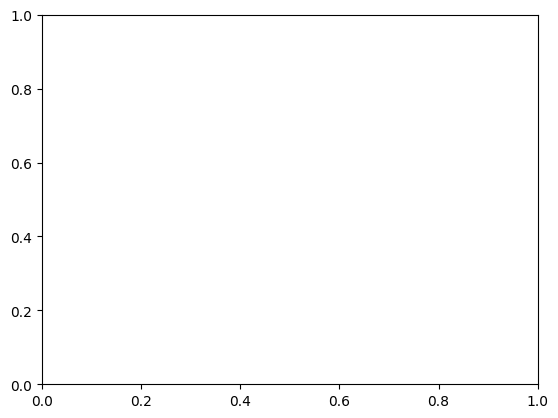

In [44]:
plt.hist(freq)
plt.show()

In [ ]:
# vamos ver os sentimentos que mais aparecem por gênero

dados.genre.unique().shape


: 

: 